In [1]:
# HIDDEN
Base.displaysize() = (5, 80)
using DataFrames
using CSV

In [2]:
# HIDDEN
students = CSV.read("roster.csv")

students.Name = copy(students.Name)
for i in 1:size(students, 1)
    students.Name[i] = lowercase(students.Name[i])
end

## Exploratory Data Analysis

The term Exploratory Data Analysis (EDA for short) refers to the process of discovering traits about our data that inform future analysis.

Here's the `students` table from the previous page:

In [3]:
students

,Name,Role
,String,String
1,keeley,Student
2,john,Student
3,bryan,Student
4,kaylan,Student
5,sol,Student
⋮,⋮,⋮


We are left with a number of questions. How many students are in this roster? What does the `Role` column mean? We conduct EDA in order to understand our data more thoroughly.

Oftentimes, we explore the data by repeatedly posing questions as we uncover more information.

**How many students are in our dataset?**

In [4]:
print("There are ", size(students, 1), " students on the roster.")

There are 279 students on the roster.

A natural follow-up question: does this dataset contain the complete list of students? In this case, this table contains all students in one semester's offering of Data 100.

**What is the meaning of the `Role` field?**

We often example the field's data in order to understand the field itself.

In [5]:
using StatsBase
roles = countmap(students.Role)
for role in roles
    println(role)
end

"Student" => 237
"Waitlist Student" => 42


We can see here that our data contains not only students enrolled in the class at the time but also the students on the waitlist. The `Role` column tells us whether each student is enrolled.

**What about the names?  How can we summarize this field?**

In Data 100 we will work with many different kinds of data, including numerical, categorical, and text data. Each type of data has its own set of tools and techniques.

A quick way to start understanding the names is to examine the lengths of the names.

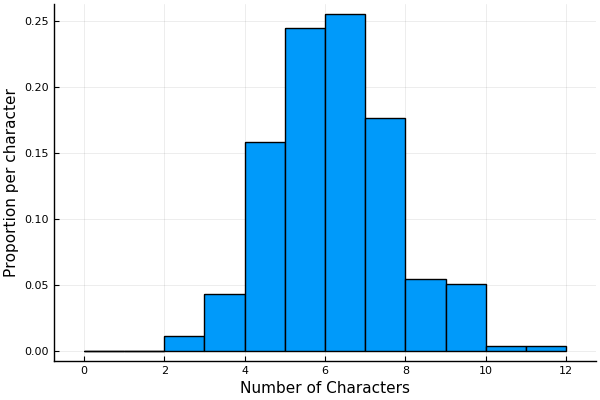

In [8]:
using Plots
pyplot()
histogram(length.(students[:Name]), normalize=true, bins=0:12,
    xaxis=("Number of Characters"), yaxis=("Proportion per character"), leg=false)

This visualization shows us that most names are between 3 and 9 characters long. This gives us a chance to check whether our data seem reasonable — if there were many names that were 1 character long we'd have good reason to re-examine our data.

### What's in a Name?

Although this dataset is rather simple, we will soon see that first names alone can reveal quite a bit about our group of students.